In [1]:

import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


2025-06-03 12:44:21.331663: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 12:44:21.343884: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 12:44:21.445307: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 12:44:21.530965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748951061.608869    1635 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748951061.63

In [2]:
metadata = pd.read_csv("HAM10000_metadata.csv")

metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
metadata = pd.read_csv("HAM10000_metadata.csv")
label_map = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
metadata['label'] = metadata['dx'].map(label_map)
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,0


In [4]:

image_dir = "HAM10000_all_images" 
IMG_SIZE = 64

images = []
labels = []

for i, row in metadata.iterrows():
    img_path = os.path.join(image_dir, row['image_id'] + '.jpg')
    if os.path.exists(img_path):
        img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
        images.append(np.array(img) / 255.0)
        labels.append(row['label'])

X = np.array(images)
y = to_categorical(labels, num_classes=7)

print("Image shape:", X.shape)
print("Label shape:", y.shape)

Image shape: (10015, 64, 64, 3)
Label shape: (10015, 7)


In [5]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)





In [13]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax') 
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall'])

model.summary()


/home/vedutla/.pyenv/versions/3.12.9/envs/skin_scan_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,055 (6.20 MB)

 Trainable params: 1,626,055 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6497 - loss: 1.1583 - recall: 0.4974 - val_accuracy: 0.6730 - val_loss: 0.9298 - val_recall: 0.5052
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6745 - loss: 0.9363 - recall: 0.5555 - val_accuracy: 0.6740 - val_loss: 0.8871 - val_recall: 0.6031
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6837 - loss: 0.8743 - recall: 0.5716 - val_accuracy: 0.6860 - val_loss: 0.8838 - val_recall: 0.6166
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6855 - loss: 0.8592 - recall: 0.5617 - val_accuracy: 0.7039 - val_loss: 0.8001 - val_recall: 0.6071
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7027 - loss: 0.8130 - recall: 0.5982 - val_accuracy: 0.7069 - val_loss: 0.7940 - val_recall: 0.6001
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7199 - loss: 0.7720 - recall: 0.6130 - val_accuracy: 0.7084 - val_loss: 0.7736 - val_recall: 0.588

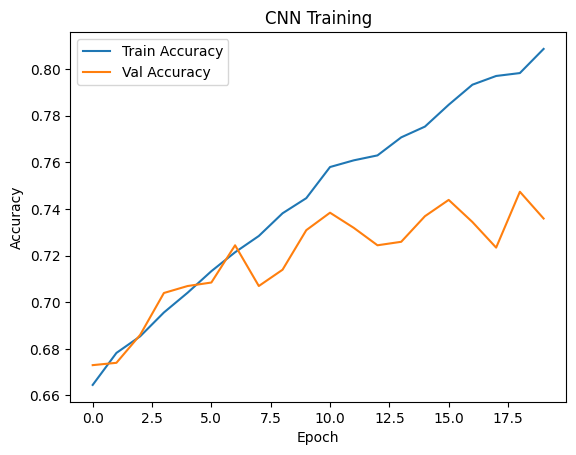

In [18]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
metadata['dx'].unique()


array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [10]:
metadata['dx'].value_counts()


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64